/Users/adrianpawlowski/Documents/AITradingPlatform/ML/rl/../data_processing.py:209: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[features] = data[features].fillna(method='ffill').fillna(method='bfill').fillna(0)
2025-04-08 17:18:42.967151: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-04-08 17:18:42.967175: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-04-08 17:18:42.967181: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-04-08 17:18:42.967199: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-08 17:18:42.967213: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhos

 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step

2025-04-08 17:18:43.210953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/opt/anaconda3/envs/ml-trading-platform/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


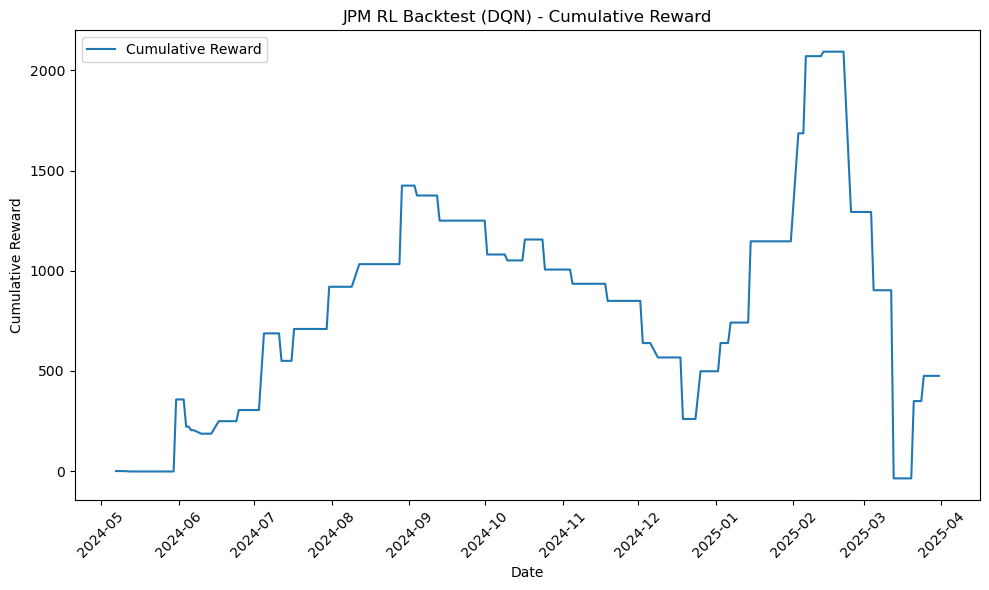

FINAL REALIZED PROFIT: 475.32999999999794


In [1]:
from run_trained_agent import run_trained_agent_on_data

# ----------------------------------------
# 1. Define parameters
# ----------------------------------------
tickers = ['JPM', 'KO', 'LMT']
start_date = "2024-01-01"
end_date = "2025-04-01"
api_key = 'NL9PDOM5JWRPAT9O'  # 🔐 Replace with your actual key

# ----------------------------------------
# 2. Define model paths and feature subsets for each ticker
# ----------------------------------------
feature_subset_KO = [
    'WCLPRICE', 'BB_lower', 'APO', 'MEDPRICE', 'HT_DCPERIOD', 'TYPPRICE',
    'TRIMA', 'MACD_hist', 'T3', 'SMA', 'AVGPRICE', 'TRANGE', 'ADXR',
    'HT_TRENDMODE', 'STOCH_fastk', 'STOCH_slowk', 'STOCH_slowd', 'TEMA',
    'CMO', 'STOCH_fastd', 'HT_DCPHASE', 'AROON_DOWN', 'CCI', 'MFI', 'OBV',
    'MACD_signal', 'MINUS_DI', 'HT_LEADSINE', 'HT_PHASOR_inphase', 'WMA'
]

feature_subset_JPM = [
    'WMA', 'HT_DCPHASE', 'STOCH_fastd', 'AROON_UP', 'TEMA', 'HT_PHASOR_quadrature', 'WCLPRICE', 'NATR',
    'ADXR', 'TYPPRICE', 'MIDPRICE', 'TRANGE', 'MACD', 'MACD_hist', 'AROONOSC', 'ADOSC', 'CMO', 'AVGPRICE',
    'ROC', 'STOCH_slowk', 'TRIMA', 'MIDPOINT', 'STOCH_slowd', 'MFI', 'STOCH_fastk'
]

feature_subset_LMT = [
    'NATR', 'STOCH_fastd', 'MOM', 'HT_PHASOR_quadrature', 'MFI', 'RSI', 'AROON_DOWN', 'STOCH_slowd',
    'MACD_signal', 'TRANGE', 'DEMA', 'BB_middle', 'SMA', 'OBV', 'MIDPRICE', 'WMA', 'STOCH_fastk', 'BB_upper',
    'ADOSC', 'AD', 'CCI', 'HT_DCPERIOD', 'ADX', 'STOCH_slowk', 'MINUS_DI', 'T3'
]

# ----------------------------------------
# 3. Loop over each ticker and call run_trained_agent_on_data
# ----------------------------------------
for ticker in tickers:
    if ticker == 'KO':
        dqn_model_path = "../models/rl/ko_dqn_model_both.h5"
        xgb_model_path = "../models/boost/xgboost_KO.joblib"
        lstm_model_path = "../models/lstm/lstm_KO_model.h5"
        feature_subset = feature_subset_KO
    elif ticker == 'JPM':
        # Replace these with the actual JPM model paths you have
        dqn_model_path = "../models/rl/jpm_dqn_model_both.h5"
        xgb_model_path = "../models/boost/xgboost_JPM.joblib"
        lstm_model_path = "../models/lstm/lstm_JPM_model.h5"
        feature_subset = feature_subset_JPM
    elif ticker == 'LMT':
        # Replace these with the actual LMT model paths you have
        dqn_model_path = "../models/rl/lmt_dqn_model_both.h5"
        xgb_model_path = "../models/boost/xgboost_LMT.joblib"
        lstm_model_path = "../models/lstm/lstm_LMT_model.h5"
        feature_subset = feature_subset_LMT

    # Run your trained agent on the current ticker
    df_results = run_trained_agent_on_data(
        ticker=ticker,
        start_date=start_date,
        end_date=end_date,
        api_key=api_key,
        dqn_model_path=dqn_model_path,
        xgb_model_path=xgb_model_path,
        lstm_model_path=lstm_model_path,
        xgb_features=feature_subset,
        plot=True
    )

    # Optionally, do something with df_results here
    # e.g., save to CSV:
    # df_results.to_csv(f"{ticker}_results.csv", index=False)
